In [ ]:
# Implement a NN with one hidden layer with two neurons 
# 1. Handle NAs
# 2. Convert the categorical into numerical values
# 3. Scale the numerical attributes
# 4. Delete the unnecessary columns
# 4. Now use this as the inout to the NN
# 5. Crate a the model, compile, fit 

#### Import the required modules

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc,recall_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
## For Grid Search
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
tf.__version__

'2.8.2'

#### Load the data

In [ ]:
# data1 = 
data1.head(3)

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1888279,117,NaN,0,0,0,0,0,0,15,...,0,-99.00,-99.00,0,No,No,Yes,Yes,No,No
1,1870557,7,2.0,0,0,0,0,0,0,0,...,0,0.50,0.28,0,Yes,No,No,Yes,No,No
2,1475481,258,15.0,10,10,77,184,46,132,256,...,0,0.54,0.70,0,No,No,No,Yes,No,No


In [ ]:
# Check data type of each attribute


sku                    int64
national_inv           int64
lead_time            float64
in_transit_qty         int64
forecast_3_month       int64
forecast_6_month       int64
forecast_9_month       int64
sales_1_month          int64
sales_3_month          int64
sales_6_month          int64
sales_9_month          int64
min_bank               int64
potential_issue       object
pieces_past_due        int64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty           int64
deck_risk             object
oe_constraint         object
ppap_risk             object
stop_auto_buy         object
rev_stop              object
went_on_backorder     object
dtype: object

#### Convert all the attributes to appropriate type

Data type conversion

    Using astype('category') to convert potential_issue, deck_risk, oe_constraint, ppap_risk, stop_auto_buy, rev_stop, and went_on_backorder attributes to categorical attributes.


##### Display data type of each variable

In [ ]:
# Can we drop?

In [ ]:
#### Missing value analysis and dropping the records with missing values


national_inv            0
lead_time            3403
in_transit_qty          0
forecast_3_month        0
forecast_6_month        0
forecast_9_month        0
sales_1_month           0
sales_3_month           0
sales_6_month           0
sales_9_month           0
min_bank                0
potential_issue         0
pieces_past_due         0
perf_6_month_avg        0
perf_12_month_avg       0
local_bo_qty            0
deck_risk               0
oe_constraint           0
ppap_risk               0
stop_auto_buy           0
rev_stop                0
went_on_backorder       0
dtype: int64

In [ ]:
#Since the number of missing values is about 5%. For initial analysis we ignore all these records


#### For neural networks we require the data to be in numeric form

In [ ]:
#seprarate categorical and numerical attributes 


Index(['forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'in_transit_qty', 'lead_time', 'local_bo_qty', 'min_bank',
       'national_inv', 'perf_12_month_avg', 'perf_6_month_avg',
       'pieces_past_due', 'sales_1_month', 'sales_3_month', 'sales_6_month',
       'sales_9_month'],
      dtype='object')


['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop']


#### Data preprocessing for numeric and categorical using pipelines

In [ ]:
# Convert categorical into numerical, standardize the numerical data

In [ ]:
#Performing train test split on the data


Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop'],
      dtype='object')
2    No
3    No
Name: went_on_backorder, dtype: category
Categories (2, object): ['No', 'Yes']


In [ ]:
#Transform the data both train and test


In [ ]:
# code Yes: 1, No:0 in y_train, y_test


In [ ]:
## Convert to numeric


### Perceptron Model (MLP) 

In [ ]:
# Design hidden layer 1 NN with number of neurons = 1, activation tanh
# Design output layer activation sigmoid



In [ ]:
# Compile the above model


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 28        
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


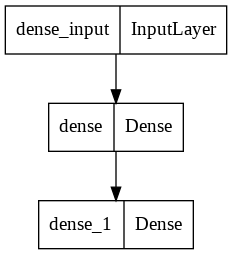

In [ ]:
# Summary


In [ ]:
# fit


Epoch 1/50
1019/1019 [==============================] - 5s 4ms/step - loss: 0.5246 - accuracy: 0.8013 - val_loss: 0.4880 - val_accuracy: 0.8110
Epoch 2/50
1019/1019 [==============================] - 4s 3ms/step - loss: 0.4848 - accuracy: 0.8121 - val_loss: 0.4858 - val_accuracy: 0.8110
Epoch 3/50
1019/1019 [==============================] - 5s 4ms/step - loss: 0.4837 - accuracy: 0.8121 - val_loss: 0.4853 - val_accuracy: 0.8110
Epoch 4/50
1019/1019 [==============================] - 4s 4ms/step - loss: 0.4833 - accuracy: 0.8121 - val_loss: 0.4851 - val_accuracy: 0.8110
Epoch 5/50
1019/1019 [==============================] - 4s 4ms/step - loss: 0.4831 - accuracy: 0.8121 - val_loss: 0.4849 - val_accuracy: 0.8110
Epoch 6/50
1019/1019 [==============================] - 3s 3ms/step - loss: 0.4830 - accuracy: 0.8121 - val_loss: 0.4848 - val_accuracy: 0.8110
Epoch 7/50
1019/1019 [==============================] - 3s 2ms/step - loss: 0.4828 - accuracy: 0.8121 - val_loss: 0.4846 - val_accuracy:

In [ ]:
# lets write a function to get the metrics & loss plots

def plot(model_history, plot_type):
    val_type = "val_"+plot_type
    plt.plot(model_history.history[plot_type])
    plt.plot(model_history.history[val_type])
    plt.title(val_type)
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()

In [ ]:
#plot accuracy

In [ ]:
# convert the outputs into 0s and 1s

#test_pred=(perceptron_model.predict(test) > 0.5).astype("int32")
#train_pred=(perceptron_model.predict(train) > 0.5).astype("int32")

In [ ]:
#confusion_matrix(y_train, train_pred)

array([[32779,   288],
       [ 7131,   532]])

In [ ]:
#confusion_matrix(y_test, test_pred)

array([[14054,    96],
       [ 3107,   199]])

(199, 3107, 96, 14054)